In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

cbb = pd.read_csv('data/cbb.csv')
cbb20 = pd.read_csv('data/cbb20.csv')


In [6]:
# Clean up the data, fix columns:
# cbb first:
    # make a new column called "SEASON_FINAL" that takes the column "POSTSEASON" and assigns a value: Champion = 1, 2nd = 2, etc.:
cbb['SEASON_FINAL'] = cbb['POSTSEASON'].replace(['Champions', '2ND', 'F4', 'E8', 'S16', 'R32', 'R64', 'R68', 'NaN'], [1, 2, 4, 8, 16, 32, 64, 68, 0])

    # Sort by "SEASON_FINAL" and then by "YEAR":
cbb = cbb.sort_values(['YEAR', 'SEASON_FINAL'], ascending=[True, True])

cbb['SEASON_FINAL'].value_counts()

#cbb.head(10)

SEASON_FINAL
64.0    320
32.0    160
16.0     80
8.0      40
68.0     40
4.0      20
1.0      10
2.0      10
Name: count, dtype: int64

In [7]:
# cbb20 next:
    # New columns: YEAR (2020 for all), SEASON_FINAL (this will be what we predict)
cbb20['YEAR'] = 2020
    # Make columns SEASON_FINAL and POSTSEASON and fill it with NaN values:
cbb20['SEASON_FINAL'] = np.nan
cbb20['POSTSEASON'] = np.nan

In [ ]:
# Visualize the data and make initial observations:
sns.scatterplot(x='BARTHAG', y='SEASON_FINAL', data=cbb)
plt.show()

In [9]:
# Find correlation between a Team's final standing (SEASON_FINAL) and other variables:
    # Correelation between Powerranking (BARTHAG) and SEASON_FINAL:
cbb['BARTHAG'].corr(cbb['SEASON_FINAL'], method = 'spearman')

-0.6461273899341722

In [11]:
# Correlation between Wins (W) and SEASON_FINAL:
cbb['W'].corr(cbb['SEASON_FINAL'], method = 'spearman')

-0.5125436890870254

In [13]:
# Correlation between Win/Loss Percentage (W-L%) and SEASON_FINAL:
cbb['W/L'] = cbb['W'] / cbb['G']

cbb['W/L'].corr(cbb['SEASON_FINAL'], method = 'spearman')

-0.3532346489556209

In [12]:
# Correlation between Seed and SEASON_FINAL:
cbb['SEED'].corr(cbb['SEASON_FINAL'], method = 'spearman')

0.6065146756151623

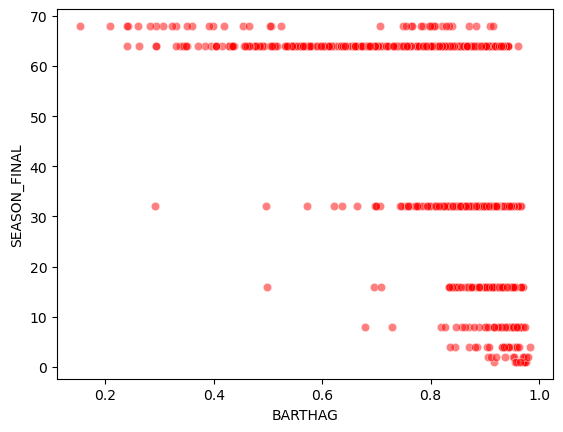

In [22]:
# Visualize the correlations:
sns.scatterplot(x='BARTHAG', y='SEASON_FINAL', data=cbb, color='red', alpha=0.5)
plt.show()

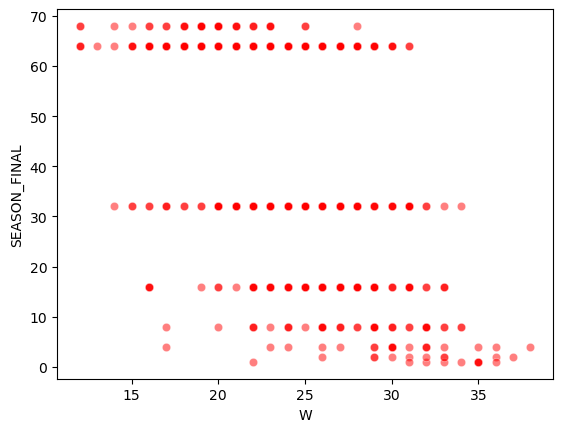

In [21]:
sns.scatterplot(x='W', y='SEASON_FINAL', data=cbb, color='red', alpha=0.5)
plt.show()

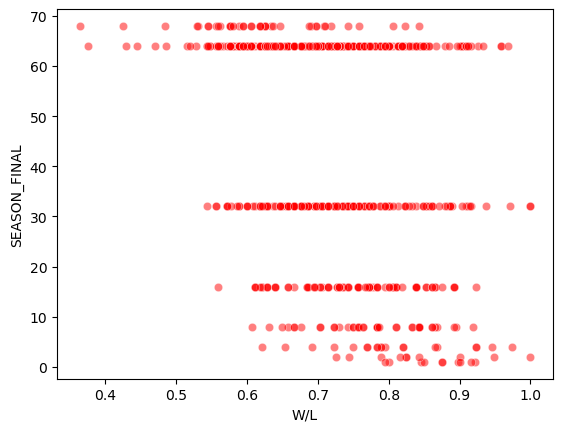

In [23]:
sns.scatterplot(x='W/L', y='SEASON_FINAL', data=cbb, color='red', alpha=0.5)
plt.show()

In [18]:
# Additional EDA and Data visualization:


In [19]:
# Combine the two datasets with desired columns:
    # Keep in mind cbb20's SEASON_FINAL and POSTSEASON columns are currently filled with NaN's:

cbb_all = pd.concat([cbb, cbb20], ignore_index=True)[['YEAR', 'TEAM', 'CONF', 'G', 'W', 'BARTHAG', 'SEASON_FINAL', 'POSTSEASON']]